In [3]:
#extract women-fashion.zip file to the same folder
from zipfile import ZipFile
import os

zip_file_path = 'women-fashion.zip'
extraction_directory = '.'

if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

['.ipynb_checkpoints', 'FRS.ipynb', 'women fashion', 'women-fashion.zip', '__MACOSX']


In [4]:
#here we ignore __MACOSX document


In [6]:
#List contents to understand teh types and number of images we have
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

In [7]:
# list the files in the updated directory
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

(['.DS_Store',
  'anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg',
  'Anarkali suit with a modern twist.jpg',
  'Anarkali suit with fitted bodice with a high neckline.jpg',
  'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg',
  'anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg',
  'anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg',
  'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg',
  'beige top adorned with black dots and a green skirt.jpg',
  'black and white gingham checkered A-line dress with a flared skirt.jpg'],
 97)

In [8]:
#display first image in dataset

In [9]:
from PIL import Image
import matplotlib.pyplot as plt



In [12]:
def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

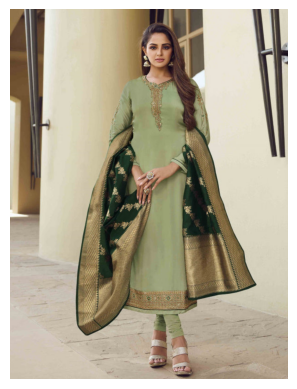

In [14]:
first_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[1])
display_image(first_image_path)

In [16]:
#create list of all image paths that will be used later in extracxting the features from every image in the dataset
'''the glob module is used to generate a list of file paths
for images stored in the directory. The glob.glob function 
searches for files that match a specified pattern, in this 
case, *.*, which matches all files within the directory.'''
import glob 
image_directory = 'women fashion'

image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

# print the list of image file paths
print(image_paths_list)

['women fashion\\anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg', 'women fashion\\Anarkali suit with a modern twist.jpg', 'women fashion\\Anarkali suit with fitted bodice with a high neckline.jpg', 'women fashion\\anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg', 'women fashion\\anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg', 'women fashion\\anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg', 'women fashion\\ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg', 'women fashion\\beige top adorned with black dots and a green skirt.jpg', 'women fashion\\black and white gingham checkered A-line dress with a flared skirt.jpg', 'women fashion\\black double-breasted

In [22]:
#Extract features from images
#tensorflow: allows us to do mathematical tasks fast when dealing with pictures, sounds, words
#keras: toolbox that makes it easy for us to build and train our deep learning models (like VGG16) without having to write a ton of code from scratch.
#VGG16: It's actually a type of deep learning model that has been trained to recognize different objects in pictures.
#Weights: features learned from the picture
#Include_top: set to flase because not all the VGG net needed
#Input_shape: This tells VGG16 what size of picture it should expect.
#Flatten: Imagine the features extracted by VGG16 as pieces of a puzzle. Flattening them is like putting all the pieces together into a single row, making it easier for us to work with them.
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

In [18]:
model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


58889256/58889256 [==============================] - 1s 0us/step


In [19]:
def extract_features(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()


In [21]:
feature_vectors = []
for img_path in image_paths_list:
    features = extract_features(img_path)
    feature_vectors.append(features)


1/1 [==============================] - 0s 102ms/step


In [26]:
import numpy as np

def recommend_fashion_images(query_feature, image_features, top_k=5):
    # Calculate cosine similarity between query feature and all other image features
    similarities = np.dot(image_features, query_feature) / (np.linalg.norm(image_features, axis=1) * np.linalg.norm(query_feature))
    
    # Get indices of top k similar images
    top_indices = np.argsort(similarities)[::-1][:top_k]
    
    return top_indices


query_image_path = '10.jpg'  # Replace 'path_to_query_image.jpg' with the path to your query image
query_feature = extract_features(query_image_path)  # Extract features for the query image
recommended_indices = recommend_fashion_images(query_feature, feature_vectors, top_k=5)
print(recommended_indices)


1/1 [==============================] - 1s 854ms/step
[57  4 50 95  0]


1/1 [==============================] - 0s 190ms/step


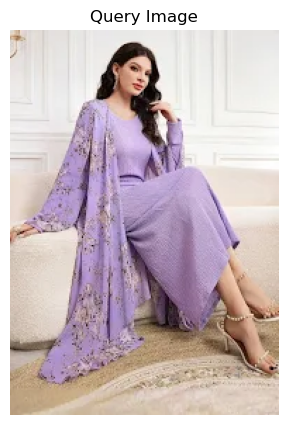

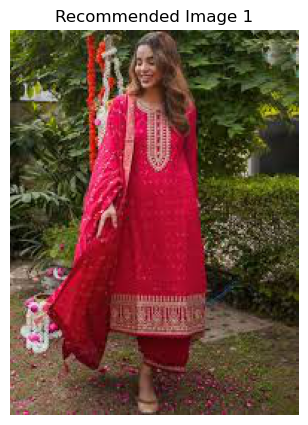

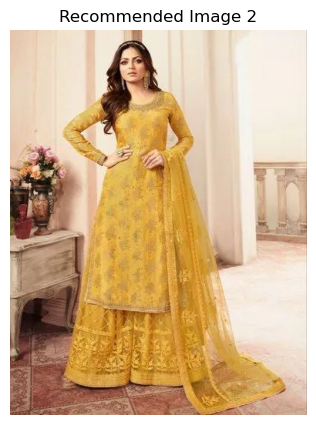

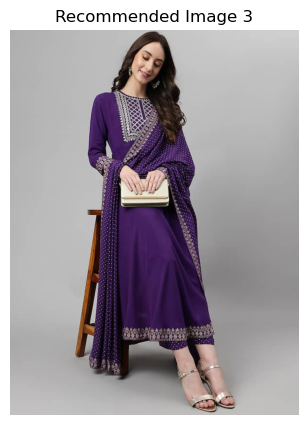

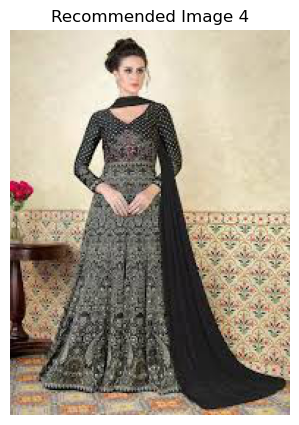

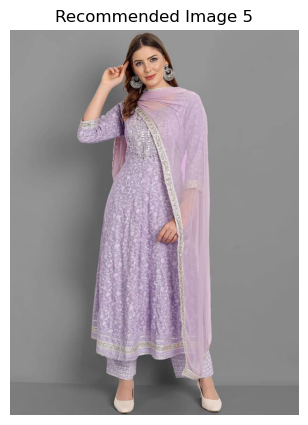

In [29]:
import matplotlib.pyplot as plt
from PIL import Image

# Assuming you have already defined the functions extract_features and recommend_fashion_images

# Example usage:
query_image_path = 'download.webp'  # Replace 'path_to_query_image.jpg' with the path to your query image
query_feature = extract_features(query_image_path)  # Extract features for the query image
recommended_indices = recommend_fashion_images(query_feature, feature_vectors, top_k=5)

# Load and display the query image
query_image = Image.open(query_image_path)
plt.figure(figsize=(5, 5))
plt.imshow(query_image)
plt.title('Query Image')
plt.axis('off')
plt.show()

# Load and display the recommended images
for i, idx in enumerate(recommended_indices):
    recommended_image_path = image_paths_list[idx]
    recommended_image = Image.open(recommended_image_path)
    plt.figure(figsize=(5, 5))
    plt.imshow(recommended_image)
    plt.title(f'Recommended Image {i+1}')
    plt.axis('off')
    plt.show()
